# Compressed sensing

## Setup

In [1]:
%matplotlib inline
import numpy as np, pandas as pd, matplotlib.pyplot as plt

## Model

In [2]:
from tramp.experiments import BayesOptimalScenario, qplot, plot_compare
from tramp.models import glm_generative

GaussBernouilliPrior(size=1000,rho=0.5,mean=0,var=1)
LinearChannel(name=F,Nx=800,Nz=1000,precompute_svd=True)
GaussianChannel(var=1e-11)


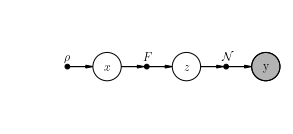

In [3]:
alpha = 0.8
N = 1000
teacher = glm_generative(
    N=N, alpha=alpha, ensemble_type="gaussian", prior_type="gauss_bernouilli", 
    output_type="gaussian", output_var=1e-11, prior_rho=0.5
)
for factor in teacher.factors:
    print(factor)
scenario = BayesOptimalScenario(teacher, x_ids=["x"])
scenario.setup()
scenario.student.plot()

## EP dynamics

In [4]:
ep_evo = scenario.ep_convergence(metrics=["mse"], max_iter=10)

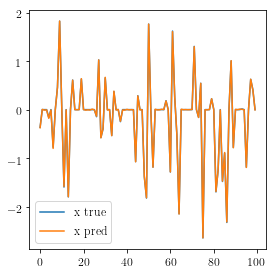

In [5]:
plot_compare(scenario.x_true["x"], scenario.x_pred["x"])

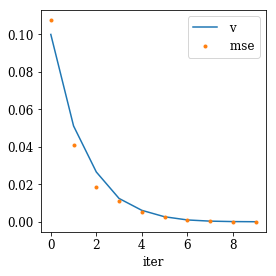

In [6]:
qplot(
    ep_evo, x="iter", y=["v", "mse"], y_markers=["-", "."], 
    y_legend=True
)

## EP vs SE

In [7]:
rename = {
    "alpha":r"$\alpha$", "prior_rho":r"$\rho$", 
    "source=":"", "n_iter":"iterations"
}
ep_vs_se = pd.read_csv("data/compressed_sensing_ep_vs_se.csv")

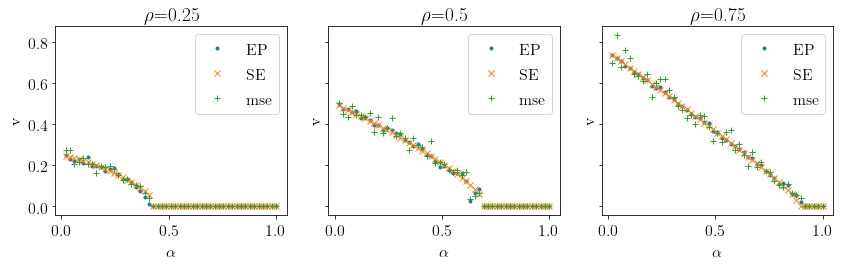

In [8]:
qplot(
    ep_vs_se, x="alpha", y="v", marker="source", column="prior_rho", 
    rename=rename, usetex=True, font_size=16
)

## MSE curves

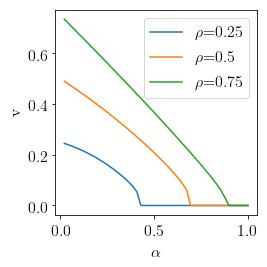

In [9]:
qplot(
    ep_vs_se.query("source=='SE'"), 
    x="alpha", y="v", color="prior_rho",
    rename=rename, usetex=True, font_size=16
)

## Nbr of iterations diverging at the critical value

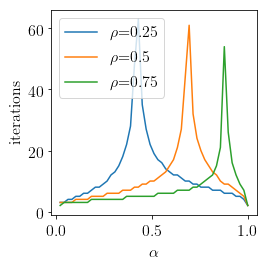

In [10]:
qplot(
    ep_vs_se.query("source=='SE'"), 
    x="alpha", y="n_iter", color="prior_rho",
    rename=rename, usetex=True, font_size=16
)

## Critical line

In [11]:
crit = pd.read_csv("data/cs_critical_lines.csv")

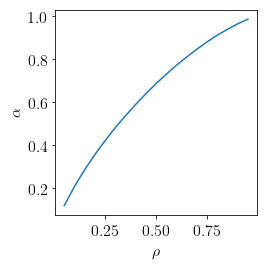

In [12]:
qplot(
    crit, 
    x="prior_rho", y="alpha",
    rename=rename, usetex=True, font_size=16
)

## Universality

The linear channel update, in the noiseless case, will only depend on the trace of the sensing matrix $F$.  Here we show for random features matrix $F = \tfrac{1}{\sqrt{N}}f(WX)$

In [13]:
univ = pd.read_csv("data/cs_universality.csv")

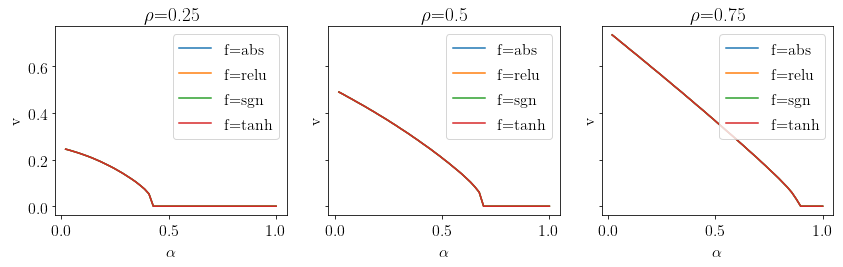

In [14]:
qplot(
    univ.query("source=='SE'"), 
    x="alpha", y="v", color="f", column="prior_rho", 
    rename=rename, usetex=True, font_size=16
)